# Importing Necessary Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Typings
from numpy import ndarray
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import History
from sklearn.preprocessing import StandardScaler



In [4]:

dataset_path: str = "../../data/assignment2/HeartDiseaseDataset_small.csv"

df = pd.read_csv(dataset_path)

X: ndarray = df.drop("HeartDisease", axis=1).to_numpy()
Y: ndarray = df["HeartDisease"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Train: 60%, Test: 20%, Validation: 20%

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


print("Input Shape: ", X_train.shape)
print("Output Shape: ", Y_train.shape)

input_shape = X_train.shape[1]

Input Shape:  (550, 6)
Output Shape:  (550,)


In [5]:
logistic_model: Sequential = Sequential([
    Input(shape=(input_shape,)),
    Dense(1, activation='sigmoid')
])

optimizer: Adam = Adam(learning_rate=0.0019)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta= 0.0001,
    restore_best_weights=True
)


logistic_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history: History = logistic_model.fit(X_train, Y_train,
                   validation_data=(X_val, Y_val),
                   epochs=38,
                   batch_size=32,
                   #callbacks=[early_stop]
                   )


Epoch 1/38


18/18 [==============================] - 1s 18ms/step - loss: 0.7758 - accuracy: 0.5127 - val_loss: 0.7831 - val_accuracy: 0.5326
Epoch 2/38
18/18 [==============================] - 0s 5ms/step - loss: 0.7512 - accuracy: 0.5345 - val_loss: 0.7577 - val_accuracy: 0.5543
Epoch 3/38
18/18 [==============================] - 0s 4ms/step - loss: 0.7283 - accuracy: 0.5509 - val_loss: 0.7339 - val_accuracy: 0.5707
Epoch 4/38
18/18 [==============================] - 0s 4ms/step - loss: 0.7080 - accuracy: 0.5873 - val_loss: 0.7124 - val_accuracy: 0.6033
Epoch 5/38
18/18 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.6109 - val_loss: 0.6927 - val_accuracy: 0.5924
Epoch 6/38
18/18 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.6345 - val_loss: 0.6749 - val_accuracy: 0.6141
Epoch 7/38
18/18 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.6491 - val_loss: 0.6593 - val_accuracy: 0.6250
Epoch 8/38
18/18 

6/6 [==============================] - 0s 3ms/step


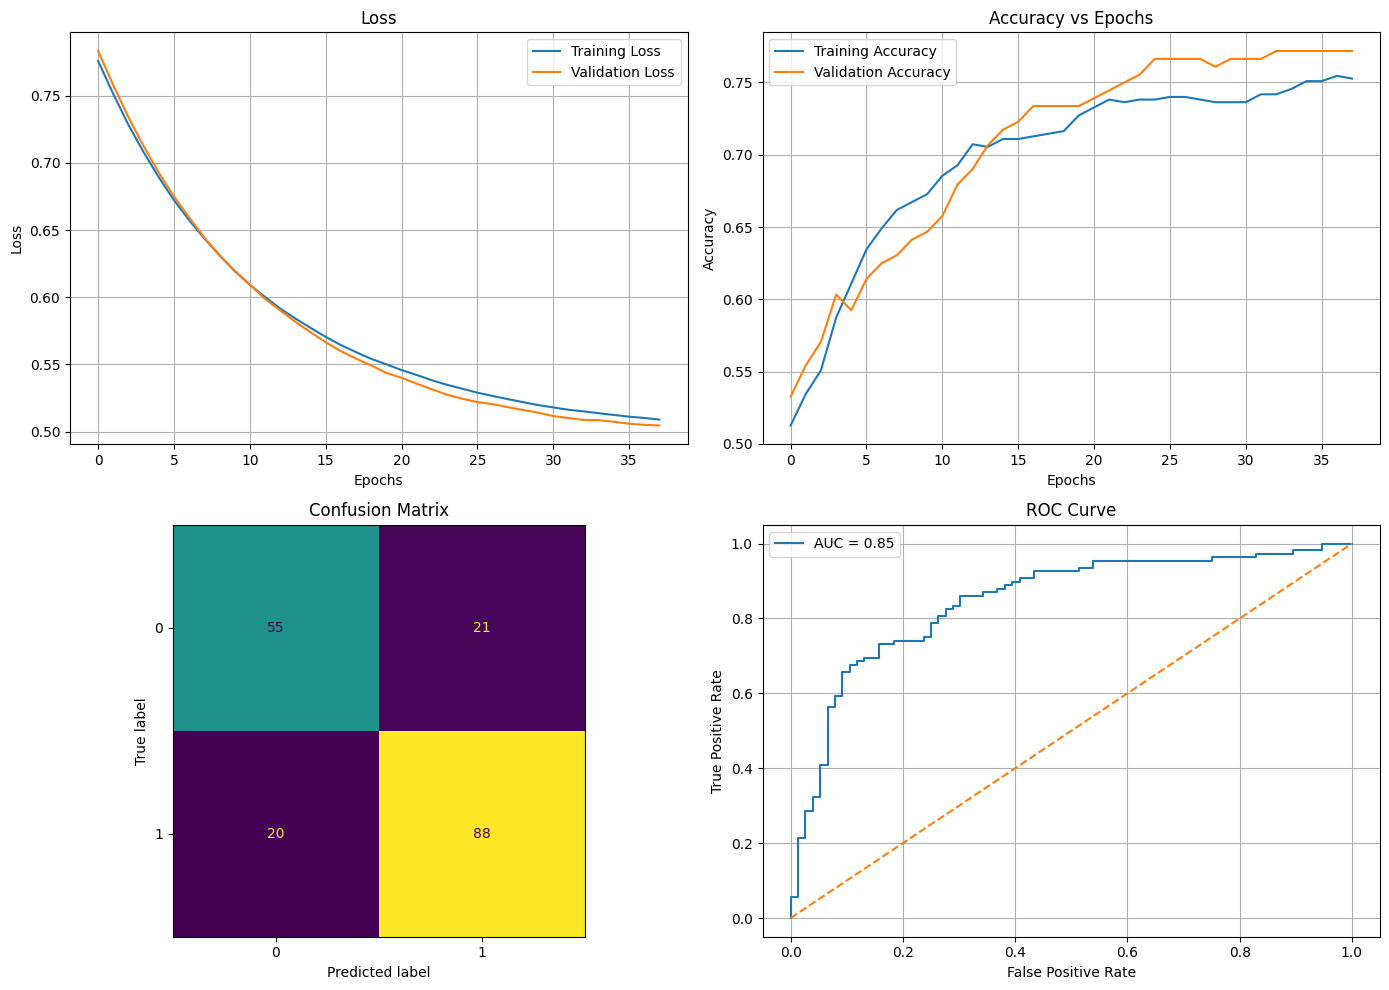

In [7]:
Y_pred_prob = logistic_model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(Y_test, Y_pred)

fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(history.history['loss'], label='Training Loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title('Accuracy vs Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1, 0], colorbar=False)
axs[1, 0].set_title("Confusion Matrix")

axs[1, 1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axs[1, 1].plot([0, 1], [0, 1], linestyle='--')
axs[1, 1].set_title('ROC Curve')
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
